<a href="https://colab.research.google.com/github/vestinabert/Image_Quality_Assessment/blob/main/Image_Quality_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import matplotlib.pyplot as plt

In [5]:
dataset_path = "/content/drive/My Drive/images_dataset/distorted_images"

In [7]:
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.bmp', '.BMP'))]

print(f"Found {len(image_files)} images")

Found 3000 images


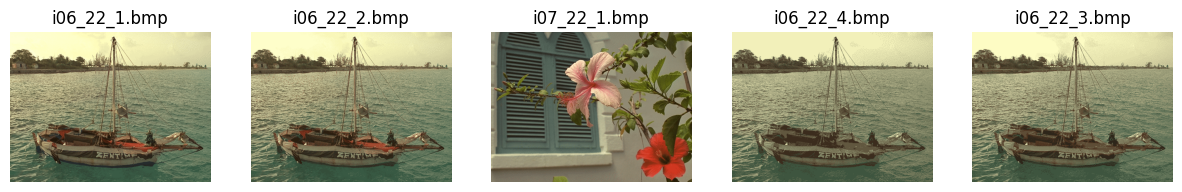

In [11]:
# Displaying first five images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_name in enumerate(image_files[:5]):
    img_path = os.path.join(dataset_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(img_name)

plt.show()

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

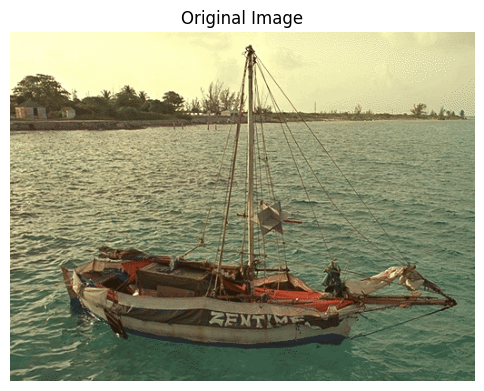

In [13]:
sample_img_name = image_files[0]
sample_img_path = os.path.join(dataset_path, sample_img_name)

# Read and convert to RGB
original_img = cv2.imread(sample_img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Display the selected image
plt.figure(figsize=(6,6))
plt.imshow(original_img)
plt.axis("off")
plt.title("Original Image")
plt.show()


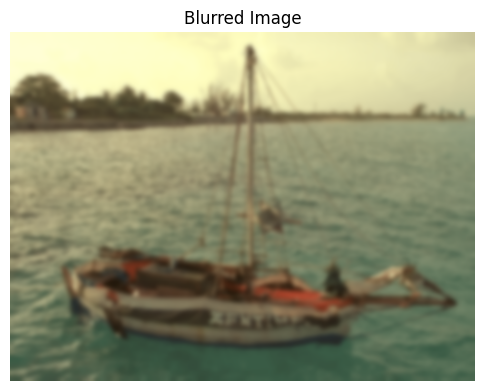

In [14]:
blurred_img = cv2.GaussianBlur(original_img, (15, 15), 0)

plt.figure(figsize=(6,6))
plt.imshow(blurred_img)
plt.axis("off")
plt.title("Blurred Image")
plt.show()


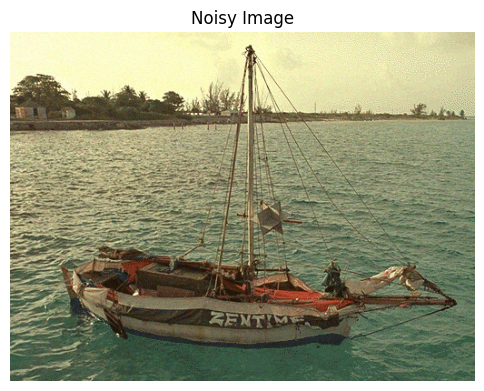

In [15]:
def add_gaussian_noise(image, mean=0, var=30):
    row, col, ch = image.shape
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_img = np.clip(image + gauss, 0, 255).astype(np.uint8)
    return noisy_img

noisy_img = add_gaussian_noise(original_img)

plt.figure(figsize=(6,6))
plt.imshow(noisy_img)
plt.axis("off")
plt.title("Noisy Image")
plt.show()


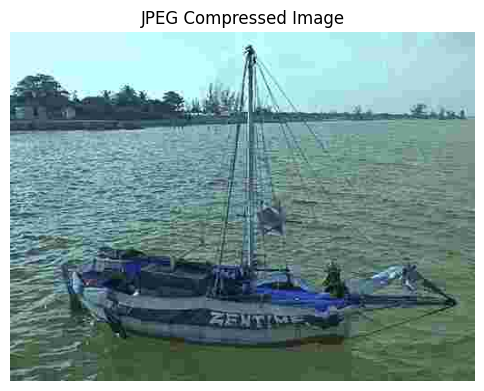

In [16]:
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 10]  # Low quality (10%)
_, compressed_img = cv2.imencode('.jpg', original_img, encode_param)
compressed_img = cv2.imdecode(compressed_img, cv2.IMREAD_COLOR)
compressed_img = cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(compressed_img)
plt.axis("off")
plt.title("JPEG Compressed Image")
plt.show()
